In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def Build_1D_Matrix(bc_left, bc_right, n, D, Width, poro):
    """
    Constructs a coefficient matrix and an array.
    Parameters:
    --------------
    bc_left: (float)  left boundary condition
    bc_right: (float) right boundary conditions
    n (int): amounts of cells
    D (float): value of the diffusion coefficient (supposed homogeneous)
    Width (float): Total phyiscal width of the domain
    poro (float): porosity value
    Returns the matrix A, and the array b to solve the
    discretized 1D diffusion problem Ax = b
    ----------
    """
    Matrix = np.zeros((n,n))
    RHS = np.zeros(n)
    dx = Width/(n-1)
    dy = dz = dx # here it is assumed that all grid cells are cubes
    coef = poro*D/dx*dy*dz
    for i in range(n):
        if i == 0:
            RHS[i] = bc_left
            Matrix[i][i] = 1
        elif i == n-1:
            RHS[i] = bc_right
            Matrix[i][i] = 1
        else:
            East = coef
            West = coef
            Matrix[i][i] = East+West
            Matrix[i][i+1] = - East
            Matrix[i][i-1] = - West      
    return Matrix, RHS

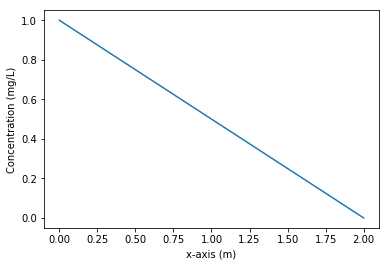

In [3]:
c_left = 1
c_right = 0
n = 50
Diff = 2e-9
Width = 2 
poro = 0.4
x = np.linspace(0,Width,n)
A, b = Build_1D_Matrix(c_left, c_right, n, Diff, Width, poro)

c_homo = np.linalg.solve(A,b)
plt.plot(x, c_homo, label="Concentration")
plt.xlabel("x-axis (m)")
plt.ylabel("Concentration (mg/L)");


In [4]:
help(Build_1D_Matrix)

Help on function Build_1D_Matrix in module __main__:

Build_1D_Matrix(bc_left, bc_right, n, D, Width, poro)
    Constructs a coefficient matrix and an array.
    Parameters:
    --------------
    bc_left: (float)  left boundary condition
    bc_right: (float) right boundary conditions
    n (int): amounts of cells
    D (float): value of the diffusion coefficient (supposed homogeneous)
    Width (float): Total phyiscal width of the domain
    poro (float): porosity value
    Returns the matrix A, and the array b to solve the
    discretized 1D diffusion problem Ax = b
    ----------



In [5]:
def avg(Di,Dj):
    """
    Computes the harmonic average between two values Di and Dj
    Returns 0 if either of them is zero
    """
    if (Di*Dj) == 0:
        return 0
    else:
        return 2/(1/Di+1/Dj)

In [6]:
def Build_1D_Inhomo_Matrix(bc_left, bc_right, n, D, Width, poro):
    """
    Constructs a coefficient matrix and an array with varying diffusion coefficient.
    Parameters:
    --------------
    bc_left: (float)  left boundary condition
    bc_right: (float) right boundary conditions
    n (int): amounts of cells
    D (array): values of the diffusion coefficient
    Width (float): Total phyiscal width of the domain
    poro (float): porosity value
    Returns the matrix A, and the array b to solve the
    discretized 1D diffusion problem Ax = b
    ----------
    """
    Matrix = np.zeros((n,n))
    RHS = np.zeros(n)
    dx = Width/(n-1)
    dy = dz = dx
    coef = poro/dx*dy*dz
    for i in range(n):
        if i == 0:
            RHS[i] = bc_left
            Matrix[i][i] = 1
        elif i == n-1:
            RHS[i] = bc_right
            Matrix[i][i] = 1
        else:
            East = coef*avg(D[i],D[i+1])
            West = coef*avg(D[i],D[i-1])
            Matrix[i][i] = East+West
            Matrix[i][i+1] = - East
            Matrix[i][i-1] = - West      
    return Matrix, RHS

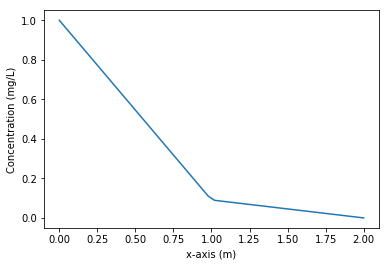

In [7]:
c_left = 1
c_right = 0
n = 50
Difflow = 2e-10
D = 2e-9*np.ones(n)
for i in range(int(n/2)):
    D[i] = Difflow
Width = 2 
poro = 0.4
x = np.linspace(0,Width,n)
A, b = Build_1D_Inhomo_Matrix(c_left, c_right, n, D, Width, poro)

c_nosource = np.linalg.solve(A,b)
plt.plot(x, c_nosource, label="Concentration")
plt.xlabel("x-axis (m)")
plt.ylabel("Concentration (mg/L)");

In [8]:
def Build_1D_Inhomo_Matrix_Source(bc_left, bc_right, n, D, Width, poro,Q):
    """
    Constructs a coefficient matrix and an array with varying diffusion coefficient and a source term
    Parameters:
    --------------
    bc_left: (float)  left boundary condition
    bc_right: (float) right boundary conditions
    n (int): amounts of cells
    D (float array): values of the diffusion coefficient
    Width (float): Total phyiscal width of the domain
    poro (float): porosity value
    Q (float array): volumetric source term
    Returns the matrix A, and the array b to solve the
    discretized 1D diffusion problem Ax = b
    
    ----------
    """
    Matrix = np.zeros((n,n))
    RHS = np.zeros(n)
    dx = Width/(n-1)
    dy = dz = dx
    coef = poro/dx*dy*dz
    for i in range(n):
        if i == 0:
            RHS[i] = bc_left
            Matrix[i][i] = 1
        elif i == n-1:
            RHS[i] = bc_right
            Matrix[i][i] = 1
        else:
            RHS[i] = Q[i]*dx*dy*dz
            East = coef*avg(D[i],D[i+1])
            West = coef*avg(D[i],D[i-1])
            Matrix[i][i] = East+West
            Matrix[i][i+1] = - East
            Matrix[i][i-1] = - West      
    return Matrix, RHS

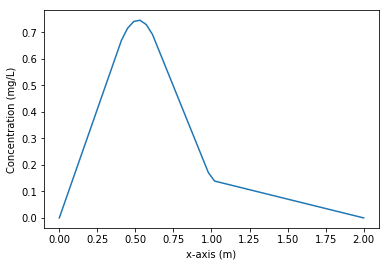

In [9]:
c_left = 0
c_right = 0
n = 50
Diff = 2e-9
D = Diff*np.ones(n)
Q = np.zeros(n)
Q[int(n/5):int(n/3)] = 1e-9 #mg/m3/s

for i in range(int(n/2)):
    D[i] = Diff/10
Width = 2 
poro = 0.4
x = np.linspace(0,Width,n)
A, b = Build_1D_Inhomo_Matrix_Source(c_left, c_right, n, D, Width, poro,Q)

c_source = np.linalg.solve(A,b)
plt.plot(x, c_source, label="Concentration")
plt.xlabel("x-axis (m)")
plt.ylabel("Concentration (mg/L)");

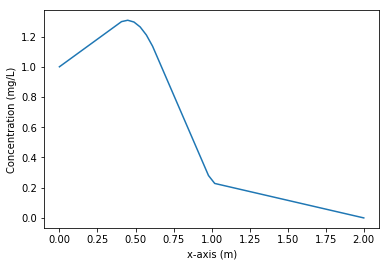

In [10]:
c_left = 1
c_right = 0
n = 50
Diff = 2e-9
D = Diff*np.ones(n)
Q = np.zeros(n)
Q[int(n/5):int(n/3)] = 1e-9 #mg/m3/s

for i in range(int(n/2)):
    D[i] = Diff/10
Width = 2 
poro = 0.4
x = np.linspace(0,Width,n)
A, b = Build_1D_Inhomo_Matrix_Source(c_left, c_right, n, D, Width, poro,Q)

c_final = np.linalg.solve(A,b)
plt.plot(x, c_final, label="Concentration")
plt.xlabel("x-axis (m)")
plt.ylabel("Concentration (mg/L)");

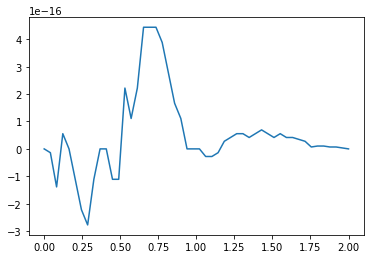

In [11]:
diff = c_final - c_nosource - c_source

plt.plot(x,diff)